# Import Libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
Read in the Social_Network_Ads.csv file and set it to a data frame called ad_data.

In [100]:
ad_data = pd.read_csv("Social_Network_Ads.csv")
ad_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Preprocessing
Preprocess the data as necessary. Split the data into training and test datasets.

In [101]:
ad_data['Gender'].replace('Male', 1, inplace=True)
ad_data['Gender'].replace('Female', 2, inplace=True)
X = ad_data[['Gender', 'Age', 'EstimatedSalary']]
y = ad_data['Purchased']
print(X.shape, y.shape)

(400, 3) (400,)


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_train.shape, X_test.shape, X.shape)
# normalization
X_train['Age'] = X_train['Age']/np.max(X_train['Age'])
X_test['Age'] = X_test['Age']/np.max(X_test['Age'])
X_train['EstimatedSalary'] = X_train['EstimatedSalary']/np.max(X_train['EstimatedSalary'])
X_test['EstimatedSalary'] = X_test['EstimatedSalary']/np.max(X_test['EstimatedSalary'])
print(X_train, X_test)

(280, 3) (120, 3) (400, 3)
     Gender       Age  EstimatedSalary
237       2  0.616667         0.533333
268       2  0.783333         0.960000
186       2  0.333333         0.546667
106       2  0.433333         0.233333
41        2  0.550000         0.340000
..      ...       ...              ...
63        1  0.533333         0.800000
326       1  0.683333         0.480000
337       1  0.583333         0.526667
11        2  0.433333         0.346667
351       1  0.616667         0.500000

[280 rows x 3 columns]      Gender       Age  EstimatedSalary
38        2  0.433333         0.483221
387       1  0.650000         0.476510
270       2  0.716667         0.892617
181       2  0.516667         0.476510
195       1  0.566667         0.288591
..      ...       ...              ...
228       2  0.666667         0.483221
178       1  0.400000         0.154362
267       1  0.616667         0.496644
147       2  0.683333         0.201342
230       2  0.583333         0.986577

[120 rows x 

# Modelling

Perform a comparative study between the Perceptron model and Logistic regression classification models for predicting the Purchased variable.

## Perceptron Model

In [103]:
from sklearn.linear_model import Perceptron
clf_per = Perceptron(tol=1e-3, random_state=0)
clf_per.fit(X_train, y_train)

Perceptron()

## Logistic Regression




In [104]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(random_state=0)
clf_log.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predictions and Evaluations


In [105]:
y_pred_per = clf_per.predict(X_test)
clf_per.score(X_test, y_test)
# print(y_pred_per)

0.825

In [106]:
clf_log.predict(X_test)
clf_log.predict_proba(X_test)
y_pred_log = clf_log.predict(X_test)
clf_log.score(X_test, y_test)
# print(y_pred_log)

0.85

In [107]:
from sklearn.metrics import confusion_matrix

In [108]:
print(confusion_matrix(y_test, y_pred_per))

[[71  9]
 [12 28]]


In [109]:
print(confusion_matrix(y_test, y_pred_log))

[[76  4]
 [14 26]]


In [110]:
from sklearn.metrics import classification_report

In [111]:
print(classification_report(y_test, y_pred_per))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        80
           1       0.76      0.70      0.73        40

    accuracy                           0.82       120
   macro avg       0.81      0.79      0.80       120
weighted avg       0.82      0.82      0.82       120



In [112]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        80
           1       0.87      0.65      0.74        40

    accuracy                           0.85       120
   macro avg       0.86      0.80      0.82       120
weighted avg       0.85      0.85      0.84       120



## Visualization

Use plotting method of your choice to compare the above two models.

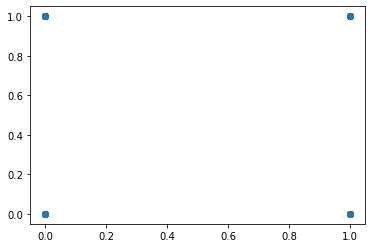

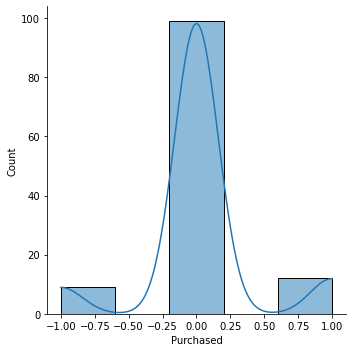

In [113]:
plt.(y_test, y_pred_per)
sns.displot((y_test - y_pred_per), bins=5, kde=True)

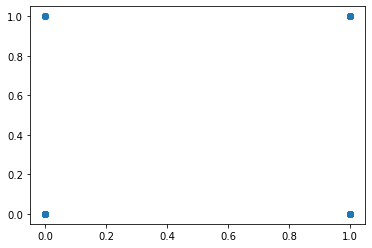

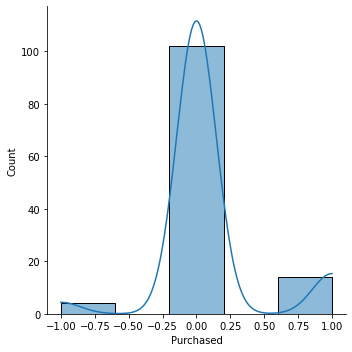

In [114]:
plt.scatter(y_test, y_pred_log)
sns.displot((y_test - y_pred_log), bins=5, kde=True)